In [413]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [414]:
df=pd.read_csv("D:\AI\ML\Datasets\Fraud_transaction.csv")

In [415]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4205626,305,CASH_OUT,222368.26,C1185538240,13730.00,0.00,C260011876,368131.87,590500.13,0,0
2841192,226,PAYMENT,33830.38,C1920650445,150472.00,116641.62,M1427597821,0.00,0.00,0,0
89650,10,CASH_IN,53643.79,C697459063,1450025.21,1503669.01,C2029518292,324901.48,271257.69,0,0
6245822,596,CASH_OUT,265945.74,C1206380686,60445.00,0.00,C1987604908,81686.03,347631.77,0,0
3027934,233,PAYMENT,9320.30,C209457080,0.00,0.00,M449106540,0.00,0.00,0,0


# EDA

In [416]:
df.shape

(6362620, 11)

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [418]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

0    6354407
1       8213
Name: isFraud, dtype: int64


<Axes: ylabel='isFraud'>

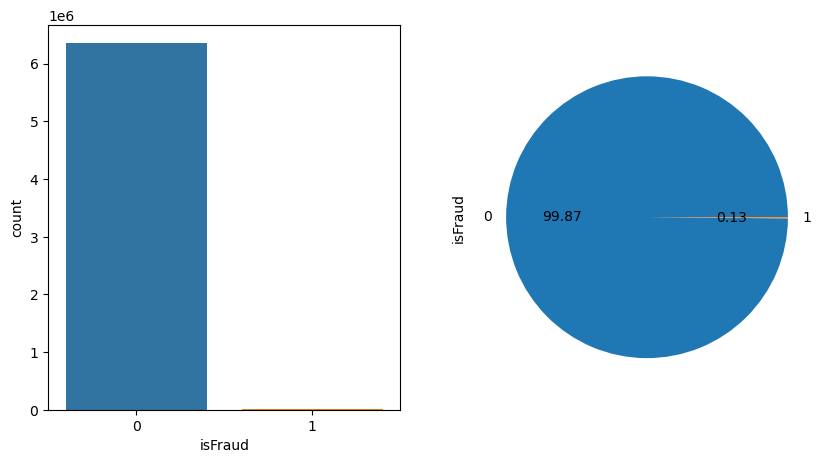

In [29]:
#for column  isFraud

print(df['isFraud'].value_counts())
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x='isFraud', data=df, ax=axs[0])
df['isFraud'].value_counts().plot(kind='pie',autopct='%.2f',ax=axs[1])

VERY MUCH IMBALANCED DATA

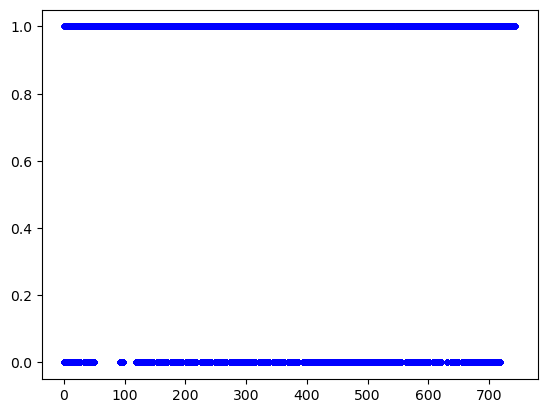

In [282]:
#for column step

#sns.barplot(x=df['isFraud'],y=df['step'])
plt.plot(df['step'],df['isFraud'],'b.')

IT IS GIVEN THE TIME LIKE 1 HR= 1STEP SO USELESS FOR OUR ML MODEL, BUT CAN HELP FOR VISUALIZING OVERTIME

type     CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
isFraud                                             
0        1399284   2233384  41432  2151495    528812
1              0      4116      0        0      4097


<Axes: xlabel='type'>

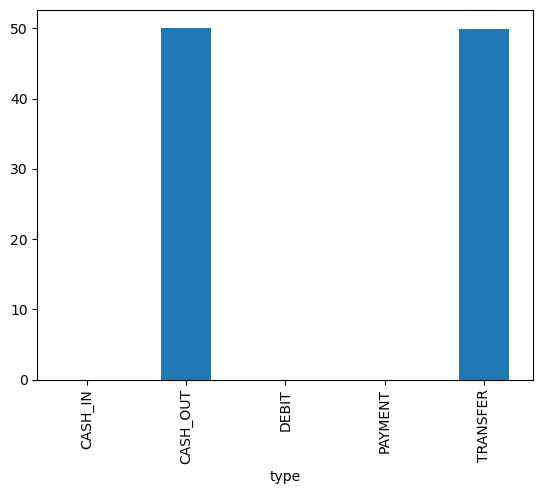

In [23]:
#for column type

print(pd.crosstab(df['isFraud'],df['type']))
t=df[['type','isFraud']].groupby('type').sum()['isFraud']
total=t.sum()
((t/total)*100).plot(kind='bar')

FRAUD OCCURS ONLY IN 'TRANSFER' AND 'CASH_OUT'

<Axes: xlabel='isFraud', ylabel='amount'>

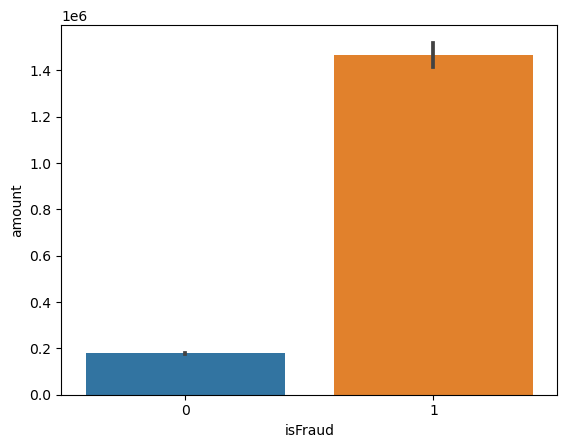

In [25]:
#for column amount
sns.barplot(x=df['isFraud'],y=df['amount'])

ON AN AVERAGE MORE AMOUNT OF TRANSACTION IS DONE WHEN IT IS FRAUD

In [419]:
#for nameOrig column

s=df[df['isFraud']==0]['nameOrig'].unique()
t=df[df['isFraud']==1]['nameOrig'].unique()
print(s.shape,t.shape)

(6345122,) (8213,)


ALL ORIGIN NAME ARE UNIQUE IN THE FRAUD CASES AND NOTIN FRAUD CASES SOME ARE USED AGIN BUT THAT DON'T MAKE ANY DIFFERECE SO I WILL DROP IT

In [420]:
#for nameDest column
s=df[df['isFraud']==0]['nameDest'].unique()
t=df[df['isFraud']==1]['nameDest'].unique()
print(s.shape,t.shape)

(2719685,) (8169,)


ALL DESTINATION NAMES ARE NEARLY UNIQUE IN THE FRAUD CASES AND NOTIN FRAUD CASES MANY ARE USED AGAIN BUT THAT DON'T MAKE ANY DIFFERECE BECAUSE SAME NAMES USED IN FRAUD CASES IS VERY LESS THAN NOT-IN FRAUD CASES SO I WILL DROP IT ALSO

In [421]:
#for column isFlaggedFraud

print(df['isFlaggedFraud'].value_counts()) #only 16 columns have 1

print(f"\nNo. of rows for amount>200000 {df[df['amount']>200000]['amount'].shape}") #there are many rows where amount is greater than 200000 but isFlaggedFraud is 0

print(f"\nNo. of rows for new and old dest balance 0 and no fraud {df[(df['oldbalanceDest']==0) & (df['newbalanceDest']==0) & (df['isFlaggedFraud']==0)].shape}")

print(f"\nNo. of rows for new and old dest balance 0, type is TRANFER and no fraud {df[(df['oldbalanceDest']==0) & (df['newbalanceDest']==0) & (df['isFlaggedFraud']==0) & (df['type']=='TRANSFER')].shape}")

df[df['isFlaggedFraud']==1]

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

No. of rows for amount>200000 (1673570,)

No. of rows for new and old dest balance 0 and no fraud (2317266, 11)

No. of rows for new and old dest balance 0, type is TRANFER and no fraud (4158, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


FOR 'ISFLAGGEDFRAUD' COLUMN ALL HAVE TYPE 'TRANSFER', 'AMOUNT' GREATER THAN 200000, 'OLDBALANCEDEST' AND 'NEWBALANCEDEST' ARE 0, 'OLDBALANCEORG' AND 'NEWBALANCEORG' REMAIN SAME BUT 'AMOUNT' OF TRANSACTION IS GIVEN, REASON FOR THIS IS NOT DESCRIBED  AND ALL ARE FRAUD CASES.
THE PRESENCE OR ABSENCE OF THE ISFLAGGEDFRAUD FLAG DOES NOT SOLELY RELY ON THE CONDITIONS WHERE OLDBALANCEDEST AND NEWBALANCEDEST ARE BOTH 0 IN TRANSFERS

BUT NONE OF THE COLUMN IS DETERMINING 'ISFLAGGEDFRAUD', IT IS NOT CORRECT THAT 'AMOUNT' > 200000 HAVE VALUE 1 AS THERE ARE ROWS WHERE VALUE IS 0
NOT CORRELATING WITH ANY OF KNOWN VARIABLE


In [422]:
#for oldbalanceOrg and newbalanceOrg

temp=df[(df['oldbalanceOrg'] ==0) &(df['newbalanceOrig']==0)][['isFraud','amount','type']]

print(f"when old and new orig balance is 0 so isFraud value counts \n{temp['isFraud'].value_counts()}")

print(f"\nwhen old and new orig balance is 0 and amount notequal to 0 \n{temp[temp['amount']!=0].shape}")

print(f"\nwhen old and new orig balance is 0 and amount notequal to 0 and isFraud value counts \n{temp[temp['amount']!=0]['isFraud'].value_counts()}")

when old and new orig balance is 0 so isFraud value counts 
0    2088944
1         41
Name: isFraud, dtype: int64

when old and new orig balance is 0 and amount notequal to 0 
(2088969, 3)

when old and new orig balance is 0 and amount notequal to 0 and isFraud value counts 
0    2088944
1         25
Name: isFraud, dtype: int64


HERE TRANSACTION AMOUNT CAN BE NON-ZERO HAVING OLD AND NEW ORIGINATOR BALANCE AS 0, I THINK THIS IS SOME MISSING OR INCORRECT INFORMATION, SO I WILL REMOVE THESE ROWS AS THEY ARE NOT AFFECTING MUCH THE FRAUD CASES.

In [423]:
#for oldbalancedDest and newbalanceDest

temp=df[(df['oldbalanceDest'] ==0) &(df['newbalanceDest']==0)][['isFraud','amount','type']]

print(f"when old and new Dest balance is 0 so isFraud value counts \n{temp['isFraud'].value_counts()}")

print(f"\nwhen old and new Dest balance is 0 and amount notequal to 0 \n{temp[temp['amount']!=0].shape}")

print(f"\nwhen old and new Dest balance is 0 and amount notequal to 0 and isFraud is 1 \n{temp[temp['amount']!=0]['isFraud'].value_counts()}")

when old and new Dest balance is 0 so isFraud value counts 
0    2313206
1       4076
Name: isFraud, dtype: int64

when old and new Dest balance is 0 and amount notequal to 0 
(2317276, 3)

when old and new Dest balance is 0 and amount notequal to 0 and isFraud is 1 
0    2313206
1       4070
Name: isFraud, dtype: int64


WE CANNOT REMOVE THESE AS FRAUD CASES ARE MORE HERE MEANS OLD AND NEW DEST BALANCE IS 0 AND AMOUNT NON-ZERO TELL US ABOUT FRAUD

In [424]:
print('Min. value of Amount, Old,New Balance of Origin and Destination:')
print(df[[ 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].min())
print('\nMax. value of Amount, Old,New Balance of Origin and Destination:')
print(df[[ 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max())

Min. value of Amount, Old,New Balance of Origin and Destination:
amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

Max. value of Amount, Old,New Balance of Origin and Destination:
amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64


In [425]:
#now analysing for value in 'nameOrig' that starts with M, these are merchants

df[df['nameDest'].str.startswith('M')]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


# Data Cleaning

In [426]:
#for merchant it is given that no information is given in oldbalanceDest and newbalanceDest
#so we will remove 0 in those columns with -1 so that our model can distinguish

df.loc[df['nameDest'].str.startswith('M'),['oldbalanceDest','newbalanceDest']]=-1

In [441]:
#found in EDA that fraud only happens in TRANSFER and CASH_OUT so removing other than these rows
df_new=df[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')]
df_new.reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [442]:
#In EDA found nameOrig nameDest and isFlaggedFraud to be useless so dropping them

df_new = df_new.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [443]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [444]:
index = df_new[ (df_new['oldbalanceOrg'] == 0) & (df_new['newbalanceOrig'] == 0) &(df_new['amount'] != 0) ].index
df_new.drop(index , inplace=True)
df_new.shape

(1461843, 8)

FOUND IN EDA THAT TRANSACTION AMOUNT CAN BE NON-ZERO HAVING OLD AND NEW ORIGINATOR BALANCE AS 0
SO REMOVING THESE ROWS AS THEY ARE NOT AFFECTING MUCH THE FRAUD CASES. (VERY LESS % OF FRAUD CASES ARE IN THIS)

BUT CANNOT REMOVE ROWS FOR AMOUNT BE NON-ZERO HAVING OLD AND NEW DESTINATION BALANCE AS 0 BECAUSE FRUD 5AGE HERE IS VERY HIGH MEANS SOME FEATURE DECIDING IT

MAKING REMAING 0 VALUES TO -1 ALSO

In [445]:
df_new.loc[(df_new['oldbalanceDest'] == 0) & (df_new['newbalanceDest'] == 0)&(df_new['amount'] != 0) ,['oldbalanceDest','newbalanceDest']]=-1

In [446]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,-1.00,-1.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,-1.00,-1.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,-1.00,-1.00,1


In [447]:
#dropping steps also
df_new = df_new.drop(['step'],axis=1)
df_new.reset_index(drop=True)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.00,0.0,-1.00,-1.00,1
1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
2,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
3,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
4,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
1461838,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
1461839,TRANSFER,6311409.28,6311409.28,0.0,-1.00,-1.00,1
1461840,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
1461841,TRANSFER,850002.52,850002.52,0.0,-1.00,-1.00,1


# Model Building

In [448]:
from sklearn.model_selection import train_test_split
y=df_new['isFraud']
df_new=df_new.drop(['isFraud'],axis=1)
X=df_new
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1169474, 6)
(1169474,)
(292369, 6)
(292369,)


Feature encoding

In [449]:
# need to encode type
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train['type'] = le.fit_transform(X_train['type'])
X_test['type'] = le.transform(X_test['type'])

In [450]:
from xgboost import XGBClassifier

clf=XGBClassifier()
clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [451]:
y_pred_test=clf.predict(X_test)
y_pred_train=clf.predict(X_train)

In [462]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
print('train accuracy= ',accuracy_score(y_train,y_pred_train) )
print('test accuracy= ',accuracy_score(y_test,y_pred_test) )
print('\ntrain precision= ',precision_score(y_train,y_pred_train) )
print('test precision= ',precision_score(y_test,y_pred_test) )

print('\ntest confusion matrix\n',confusion_matrix(y_test,y_pred_test))
print('\ntrain confusion matrix\n',confusion_matrix(y_train,y_pred_train))

train accuracy=  0.9994245276081384
test accuracy=  0.9988576080227384

train precision=  0.9900497512437811
test precision=  0.9621818181818181

test confusion matrix
 [[290712     52]
 [   282   1323]]

train confusion matrix
 [[1162831      60]
 [    613    5970]]


THOUGH THE DATA IS HIGHLY IMBALANCED SO FOR THAT DECISION TREE WORKS BEST FOR THAT BUT I USED XGBOOST WHICH INTERNALLY WORKS LIKE DECISION TREE AND ALSO IT IS FASTER THAN RANDOMFOREST AND DECISION TREE AS WORK PARALLELY.
MODEL IS NOT EITHER UNDERFITTING OR OOVERFITTING, IT IS WORKING BEST
I CAN TRY DIFFERENT THINGS BUT THOUGH WE ARE GETTING THE BEST RESULT SO STOPING MY WORK HERE

TEST PRECISION WE ARE GETTING IS 96.21%

-----------------------------------------------------------------------------------------------------

1-Data cleaning including missing values, outliers and multi-collinearity.
Ans- I described all the things that i did above, missing values were in old/new balance orig/dest when these have 0 value and transaction amount is non-zero, so impute some and put -1 in other so that our model can distinguish between them, removed values that are unneccessary, and for multi-collinearuty I did nothing because on decision tree or decision tree like algo, it has very less impact nealy no impact.

2-Describe your fraud detection model in elaboration.
Ans- I applied EDA and deduced many things from that and analyse all columns and remove the unnecessary features and after analysing and selecting relevant features I applied XGBoost classifier because of imbalanced data.

3-How did you select variables to be included in the model?
Ans- I analyse them one by one then w.r.t to isFraud doing bivariate and multivariate analysis then decided. Can see the important feature using Random forest.

4-Demonstrate the performance of the model by using best set of tools.
Ans- though the data is imbalanced so use of precision is better tool.

5-What are the key factors that predict fraudulent customer?
Ans- Transaction amount, Transaction timespan, destination history

6-Do these factors make sense? If yes, How? If not, How not?
Ans-    a- Transaction amount: large transaction amounts can be indication of fraud, as fraudsters attemp to empty the
        account by making large transactions.
        b- Transaction timespan: fraudsters attemp to empty the account by making transactions in a row.
        c- transaction destination history:  Unusual IP addresses, proxy servers, or frequent access from different locations.

7-What kind of prevention should be adopted while company update its infrastructure?
Ans- High quality training data so that can be used to train the machine learning model, keep the logs

8- Assuming these actions have been implemented, how would you determine if they work?
Ans- By evaluating the percentage of detected fraudulent activities, monitoring the reduction in fraud related losses, customer
     feedback and ensure that fraud prevention measures do not impact him/her.